In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/fatma/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

In [2]:
w2v_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/word2vec/majority_words_sim_to_profane_vector.csv")
glove_wk_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/glove-wk/majority_words_sim_to_profane_vector.csv")
glove_twitter_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/glove_twitter/majority_words_sim_to_profane_vector.csv")
ud_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/UD/majority_words_sim_to_profane_vector.csv")
chan_sim_Scores_ethnicity_words_and_profane_words = pd.read_csv("Results/ethnicity_similarities/chan/majority_words_sim_to_profane_vector.csv")

In [3]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    #print(array.shape)
    array = array.flatten()
    #print(array.shape)
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))


In [4]:
def get_sim_scores(word_list, sim_df):
    w2v_sim = []
    for i in word_list:
        if i in sim_df["words"].values:
            w2v_sim.append(sim_df[sim_df["words"] == i]["sim_score"].values[0])
        else:
            w2v_sim.append(0)
    return w2v_sim

In [5]:
w2v_sim_Scores_ethnicity_words_and_profane_words.columns

Index(['Unnamed: 0', 'words', 'sim_score'], dtype='object')

In [6]:
data_folder = "../../Data/"

In [7]:
data = pd.read_csv(data_folder+"/ethnicity_names_and_offenses/word_based_bias_list.csv")
harmless_minority = data[data["categorization"] == "harmless-minority"]
offensive_minority = data[data["categorization"] == "offensive-minority-reference"]

In [8]:
harmless_minority_words = harmless_minority["word"].values
offensive_minority_words = offensive_minority["word"].values

In [9]:
harmless_minority_words

array(['lesbians?', 'islam[a-z]*', 'gays?', 'bisexuals?',
       'transgender[a-z]*', 'trans[+\\*]?', 'queers?', 'lgbt[a-z\\+\\*]*',
       'lgbtq[a-z\\+\\*]*', 'homosexual\\w*', 'heterosexual\\w*',
       'wom[ae]n', 'females*', 'girls?', 'non-?binar\\w*', 'africans?',
       'african americans?', 'blacks?', 'hispanic\\w*',
       'latin[oax][a-z]*', 'mexicans?', 'indians?',
       'middle eastern[a-z]*', 'muslims?', 'arabs?', 'jew\\w*'],
      dtype=object)

In [10]:
harmless_minority_words_clean = ["hetrosexuals", "straight", "cisgender","men", "man","male","boys","whites",
                                 "european americans", "norwegian", "canadian", "german", "australian", "english",
                                "french", "american", "swedish", "dutch", "christianity","christian", "atheist", "agnostic"]

In [11]:
len(harmless_minority_words_clean)

22

In [12]:
all_data_dict = {}
words = harmless_minority_words_clean
w2v_sim = get_sim_scores(harmless_minority_words_clean, w2v_sim_Scores_ethnicity_words_and_profane_words)
glove_wk_sim_scores = get_sim_scores(harmless_minority_words_clean, glove_wk_sim_Scores_ethnicity_words_and_profane_words)
glove_twitter_sim_Scores = get_sim_scores(harmless_minority_words_clean, glove_twitter_sim_Scores_ethnicity_words_and_profane_words)
ud_sim_scores = get_sim_scores(harmless_minority_words_clean, ud_sim_Scores_ethnicity_words_and_profane_words)
chan_sim_scores = get_sim_scores(harmless_minority_words_clean, chan_sim_Scores_ethnicity_words_and_profane_words)

In [13]:
all_data_dict["ethnicity_word"] = words
all_data_dict["w2v_sim"] = w2v_sim
all_data_dict["glove_wk_sim"] = glove_wk_sim_scores
all_data_dict["glove_twitter_sim"] = glove_twitter_sim_Scores
all_data_dict["ud_sim"] = ud_sim_scores
all_data_dict["chan_sim"] = chan_sim_scores

(array([11.,  0.,  0.,  0.,  1.,  1.,  0.,  4.,  2.,  3.]),
 array([0.        , 0.072129  , 0.144258  , 0.216387  , 0.288516  ,
        0.360645  , 0.432774  , 0.50490299, 0.57703199, 0.64916099,
        0.72128999]),
 <BarContainer object of 10 artists>)

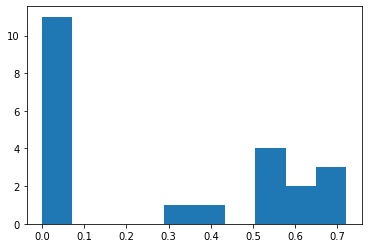

In [14]:
plt.hist(all_data_dict["w2v_sim"])

In [15]:
all_data_df = pd.DataFrame(all_data_dict)

In [16]:
empty_all_data_df = all_data_df[(all_data_df["w2v_sim"]==0) &
                                (all_data_df["glove_wk_sim"]==0) &
                                (all_data_df["glove_twitter_sim"]==0) &
                                (all_data_df["ud_sim"]==0) &
                                (all_data_df["chan_sim"]==0)]
all_data_df = all_data_df[~all_data_df.index.isin(empty_all_data_df.index)]

In [17]:
len(empty_all_data_df), len(all_data_df)

(10, 12)

In [18]:
all_data_df.to_csv("Results/all_WE_majority_words_sim_to_profane_vector.csv")

In [19]:
all_data_df.mean()

w2v_sim              0.526195
glove_wk_sim         0.276796
glove_twitter_sim    0.393705
ud_sim               0.304851
chan_sim             0.324279
dtype: float64

In [20]:
all_data_df.columns

Index(['ethnicity_word', 'w2v_sim', 'glove_wk_sim', 'glove_twitter_sim',
       'ud_sim', 'chan_sim'],
      dtype='object')

In [21]:
from scipy.stats import wilcoxon,spearmanr,ttest_ind,ks_2samp

print(wilcoxon(all_data_df["w2v_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["w2v_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["w2v_sim"], all_data_df["ud_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["w2v_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=15.0, pvalue=0.06396484375)
WilcoxonResult(statistic=12.0, pvalue=0.06188375105213765)
WilcoxonResult(statistic=19.0, pvalue=0.12939453125)
WilcoxonResult(statistic=22.0, pvalue=0.20361328125)


/home/fatma/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [22]:
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["ud_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_wk_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=15.0, pvalue=0.06396484375)
WilcoxonResult(statistic=19.0, pvalue=0.12939453125)
WilcoxonResult(statistic=27.0, pvalue=0.38037109375)
WilcoxonResult(statistic=21.0, pvalue=0.17626953125)


In [23]:
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["ud_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["glove_twitter_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=12.0, pvalue=0.06188375105213765)
WilcoxonResult(statistic=19.0, pvalue=0.12939453125)
WilcoxonResult(statistic=19.0, pvalue=0.12939453125)
WilcoxonResult(statistic=26.0, pvalue=0.33935546875)


In [24]:
print(wilcoxon(all_data_df["ud_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["ud_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["ud_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["ud_sim"], all_data_df["chan_sim"],alternative='two-sided'))

WilcoxonResult(statistic=19.0, pvalue=0.12939453125)
WilcoxonResult(statistic=27.0, pvalue=0.38037109375)
WilcoxonResult(statistic=19.0, pvalue=0.12939453125)
WilcoxonResult(statistic=36.0, pvalue=0.85009765625)


In [25]:
print(wilcoxon(all_data_df["chan_sim"], all_data_df["w2v_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["chan_sim"], all_data_df["glove_wk_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["chan_sim"], all_data_df["glove_twitter_sim"],alternative='two-sided'))
print(wilcoxon(all_data_df["chan_sim"], all_data_df["ud_sim"],alternative='two-sided'))

WilcoxonResult(statistic=22.0, pvalue=0.20361328125)
WilcoxonResult(statistic=21.0, pvalue=0.17626953125)
WilcoxonResult(statistic=26.0, pvalue=0.33935546875)
WilcoxonResult(statistic=36.0, pvalue=0.85009765625)


In [19]:
fig = figure(figsize=(25, 15), dpi=1200)
x_axis = np.arange(len(all_data_df["ethnicity_word"]))
y_axis = [all_data_df["w2v_sim"], all_data_df["glove_wk_sim"], all_data_df["glove_twitter_sim"], all_data_df["ud_sim"], all_data_df["chan_sim"]]

width = 0.3
ind = 0.3
plt.bar(x_axis , y_axis[0], color='b', label="w2v", width=width)
plt.bar(x_axis, y_axis[1], color='r', label="glove-wk", width=width)
plt.bar(x_axis, y_axis[2], color='g', label = "glove-twitter", width=width)
plt.bar(x_axis, y_axis[3], color='orange', label ="ud", width=width)
plt.bar(x_axis, y_axis[4], color='black', label="chan", width=width)


plt.xticks(x_axis, all_data_df["ethnicity_word"], fontsize=40, rotation=90, fontweight='bold')
plt.ylabel("similarity score", fontsize=40, fontweight='bold')
plt.yticks( fontsize=40, fontweight='bold')
plt.legend(bbox_to_anchor=(-0.1, 1.1), loc='upper left', fontsize=40, ncol=5)
fig.savefig("Results/all_WE_minority_words_sim_to_profane_vector.pdf", bbox_inches='tight')